# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.weightstats as sm
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

# Question 1
## Is the distribution of body temperatures normal?

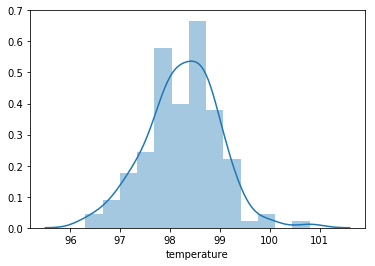

In [49]:
# Plot the data with a histogram with the kde overlayed.
sns.distplot(df['temperature'])
plt.show()

The data seems to follow the normal distribution.  It could be very slightly skewed to one side.

# Question 2
## Is the sample size large? Are the observations independent?

The sample contains 130 entries.  Based on the Central Limit Theorem, the sample size is considered large.

Whether or not the observations are independent depends on how the samples were obtained.  It is not clear from the background information whether or not it was a random sample without replacement or with replacement.  If it was with replacement, then yes the observations are independent; otherwise, it would not be.  However, I would lean towards assuming that the observations are independent.

# Question 3
## Is the true population mean really 98.6 degrees F?

In order to answer this question, we would use a one-sample test.  We don't use a two-sample test because we want to compare the sample mean against the mean of 98.6.

In this situation, we would use the t-test because we don't know the population standard deviation.

In [50]:
# The following is the 1-sample t-test.
t_value, p_value = stats.ttest_1samp(df.temperature, 98.6)

print('The sample mean is: ', df.temperature.mean())
print('The t-statistic is: ', t_value)
print('The p-value is: ', p_value)

The sample mean is:  98.24923076923078
The t-statistic is:  -5.45482329236
The p-value is:  2.41063204156e-07


Based on the result above, we can safely reject the null hypothesis and conclude that the true population mean is different than 98.6.  It is highly unlikely that our sample mean of 98.25 would occur if the true population mean was 98.6.

Let's see what happens if we run a z-test instead of a t-test.

In [51]:
z_score, p_value = ztest(df.temperature, value=98.6)
print('The z-statistic is: ', z_score)
print('The p-value is: ', p_value)

The z-statistic is:  -5.45482329236
The p-value is:  4.9021570141e-08


With the z-test, we would still reject the null hypothesis.  We would expect this because with a large enough sample size, their distributions are pretty much the same.

# Question 4
## Draw a small sample of size 10 from the data and repeat both tests.

In [52]:
# Set the seed for reproducible sampling from the dataframe.
np.random.seed(10)

# Sample from the dataframe.
sample_temps = np.random.choice(df.temperature, 10)

# Print the sample data.
print(sample_temps)

[ 98.6  96.3  98.8  98.7  99.1  97.2  99.1  98.4  98.8  99.3]


Now we'll run the t-test first.

In [53]:
t_value, p_value = stats.ttest_1samp(sample_temps, 98.6)

print('The sample mean is: ', sample_temps.mean())
print('The t-statistic is: ', t_value)
print('The p-value is: ', p_value)

The sample mean is:  98.43
The t-statistic is:  -0.56733244723
The p-value is:  0.584359801476


The following is the z-test.

In [54]:
z_score, p_value = ztest(sample_temps, value=98.6)
print('The z-statistic is: ', z_score)
print('The p-value is: ', p_value)

The z-statistic is:  -0.56733244723
The p-value is:  0.570488336142


Because of the small sample size and the fact that we still don't know the population standard deviation, the correct test to use is the T-test.

We see that the the p-values are again similar in this case and that we would reach the same conclusion in failing to reject the null hypothesis.

The difference in the application of the t and z statistic lies in the what we know about the underlying population and the sample size.  If we know the population standard deviation and the sample size is greater than 30, then we would use the Z-test.  Otherwise, we would use the T-test.

# Question 5
# At what temperature would we consider someone's temperature to be abnormal?

Before peforming the hypothesis test we must make a few assumptions.  First, we must assume that the data is representative of the population and it was generated using simple random sampling.  Secondly, we will assume that the underlying distribution of the population is normal.

We will define a temperature to be abnormal if it falls outside our 95% confidence interval of the mean of our dataset.

We will perform a t-test to generate our confidence intervals.

In [83]:
import statsmodels.stats.api as sms

print('The 95% CI for the mean is: ', sms.DescrStatsW(df.temperature).tconfint_mean())
print('The margin of error is: ', 98.38-98.12)


The 95% CI for the mean is:  (98.122002905608028, 98.376458632853499)
The margin of error is:  0.2599999999999909


# Question 6
## Is there a significant difference between males and females in normal temperature?

We will be using the two-sample t-test to answer this question.  We use this test because we don't know the true population's standard deviation.

We will be splitting the data into males and females.  We also will be assuming that these two samples are independent.

The CLT will hold because the samples sizes are large enough and we're assuming that a simple random sampling was performed.

In [88]:
t_value, p_value = stats.ttest_ind(df[df.gender == 'F'].temperature, df[df.gender == 'M'].temperature)

print('The T-Statistic is: ', t_value)
print('The p-value is: ', p_value)

The T-Statistic is:  2.28543453817
The p-value is:  0.0239318831224


We reject the null hypothesis and conclude that there is a statistical difference in the average temperatures of males and females.

# Conclusions

We can conclude the following things:
1. The true normal human body temperature is not 98.6.  
2. The distribution of human body temperatures is normal
3. There is a difference in the average temperature for males and females.